In [151]:
# --------------------------------------------------------------------------------------------------------------
#                                        IPL Win Predictor
# ---------------------------------------------------------------------------------------------------------------

#### Importing required Libraries 

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading match and delivery datasets 

In [153]:
match = pd.read_csv('IPL_Matches.csv')
delivery = pd.read_csv('IPL_Ball.csv')

In [154]:
match.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [155]:
delivery.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [156]:
match.shape

(950, 20)

In [157]:
delivery.shape

(225954, 17)

### Feature Engineering 

#### Extracting runs scored in each innings for every match

In [158]:
total_score = delivery.groupby(['ID','innings'])['total_run'].sum().reset_index()
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


#### Extracting total_runs for first inning from every match

In [159]:
total_score = total_score[total_score['innings'] == 1]
total_score

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


#### Merging first inning score in total_score dataframe with match dataframe 

In [160]:
match_df = match.merge(total_score[['ID','total_run']], on = 'ID')
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157


In [161]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

#### Merging those teams who has a different name in past with their present name 

In [162]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Rising Pune Supergiant','Lucknow Super Giants')
match_df['Team2'] = match_df['Team2'].str.replace('Rising Pune Supergiant','Lucknow Super Giants')


match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['Team2'] = match_df['Team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [163]:
Teams = ['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [164]:
match_df = match_df[match_df['Team1'].isin(Teams)]
match_df = match_df[match_df['Team2'].isin(Teams)]

In [165]:
match_df.shape

(696, 21)

In [166]:
match_df['method'].value_counts()

D/L    9
Name: method, dtype: int64

#### Removing rain affected matches 

In [167]:
match_df = match_df[match_df['method'] != 'D/L']

In [168]:
match_df.shape

(687, 21)

#### now we have data of 687 matches 

#### Extracting only useful columns from match_df dataframe 

In [169]:
match_df = match_df[['ID','Venue','WinningTeam','total_run']]
match_df

,ID,Venue,WinningTeam,total_run
0,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130
1,1312199,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,157
2,1312198,"Eden Gardens, Kolkata",Royal Challengers Bangalore,207
3,1312197,"Eden Gardens, Kolkata",Gujarat Titans,188
4,1304116,"Wankhede Stadium, Mumbai",Punjab Kings,157
...,...,...,...,...
943,335988,"Rajiv Gandhi International Stadium, Uppal",Delhi Daredevils,142
945,335986,Eden Gardens,Kolkata Knight Riders,110
946,335985,Wankhede Stadium,Royal Challengers Bangalore,165
947,335984,Feroz Shah Kotla,Delhi Daredevils,129


#### Maerging match_df dataframe with delivery_df dataframe

In [170]:
delivery_df = match_df.merge(delivery,on='ID')

#### Merging those teams who has a different name in past with their present name 

In [171]:
delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Rising Pune Supergiant','Lucknow Super Giants')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Rising Pune Supergiant','Lucknow Super Giants')


delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Gujarat Lions','Gujarat Titans')

In [172]:
delivery_df = delivery_df[delivery_df['WinningTeam'].isin(Teams)]
delivery_df = delivery_df[delivery_df['BattingTeam'].isin(Teams)]

#### Number of Teams present in Tournament 

In [173]:
delivery_df['BattingTeam'].nunique()

10

In [174]:
#### Creating a new feature Bowling Team for further addition in our dataset

In [175]:
bowler_df = delivery_df[delivery_df['innings'] == 1][['ID','BattingTeam']]
bowler_df.rename({'BattingTeam':'BowlingTeam'}, axis = 1, inplace = True)
bowler_df = bowler_df.groupby('ID')['BowlingTeam'].last().reset_index()
bowler_df

,ID,BowlingTeam
0,335982,Kolkata Knight Riders
1,335984,Rajasthan Royals
2,335985,Mumbai Indians
3,335986,Sunrisers Hyderabad
4,335988,Sunrisers Hyderabad
...,...,...
679,1304116,Sunrisers Hyderabad
680,1312197,Rajasthan Royals
681,1312198,Royal Challengers Bangalore
682,1312199,Royal Challengers Bangalore


#### Keeping only those matches in our dataset which are present in that dataset from where we will be fetching our bowling team

In [176]:
delivery_df = delivery_df[delivery_df['ID'].isin(bowler_df['ID'])]

#### Keeping only second innings data 

In [177]:
delivery_df = delivery_df[delivery_df['innings'] == 2]

In [178]:
#### Doining a Left join on delivery_df with bowler_df for fetching a new feature bowling team

In [179]:
delivery_df = delivery_df.merge(bowler_df,how = 'left', on = 'ID')
delivery_df

,ID,Venue,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
1,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
2,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
3,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
4,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79447,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
79448,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
79449,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
79450,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,222,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


#### Creating a new feature for calculating total runs after each ball

In [180]:
delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']

#### Creating a new feature for understaing runs_left while chasing after each ball

In [181]:
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

#### Creating a new feature for understanding number of balls left in inning

In [182]:
delivery_df['balls_left'] = 120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

#### Creating a new feature for undersating number of wickets left after each ball

In [183]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')
wickets = delivery_df.groupby('ID').cumsum()['player_out'].values
delivery_df['wickets'] = 10 - wickets

#### Creating a new feature for undersating Current run rate after every ball

In [184]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

#### Creating a new feature for undersating Required run rate after every ball

In [185]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

#### Creating our last feature for knowing the final result of that match

In [186]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [187]:
delivery_df.head()

,ID,Venue,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
0,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,1,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,0,130,119,10,0.0,6.554622,1
1,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,2,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,0,130,118,10,0.0,6.610169,1
2,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,3,WP Saha,TA Boult,Shubman Gill,...,NaN,Gujarat Titans,Rajasthan Royals,1,129,117,10,2.0,6.615385,1
3,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,4,Shubman Gill,TA Boult,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,1,129,116,10,1.5,6.672414,1
4,1312200,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,130,2,0,5,Shubman Gill,TA Boult,WP Saha,...,NaN,Gujarat Titans,Rajasthan Royals,1,129,115,10,1.2,6.730435,1


#### Extracting only useful feature and storing them into final_df dataframe 

In [188]:
final_df = delivery_df[['BattingTeam','BowlingTeam','Venue','runs_left','balls_left','wickets','total_run_x','crr','rrr','result']]

#### Shuffling whle dataset so that our model can learn the patterns well

In [189]:
final_df = final_df.sample(final_df.shape[0])

In [190]:
final_df.sample(5)

,BattingTeam,BowlingTeam,Venue,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
54290,Sunrisers Hyderabad,Delhi Capitals,Feroz Shah Kotla,58,51,7,114,4.869565,6.823529,1
3591,Mumbai Indians,Rajasthan Royals,"Dr DY Patil Sports Academy, Mumbai",25,19,6,158,7.900990,7.894737,1
43478,Mumbai Indians,Delhi Capitals,Feroz Shah Kotla,141,83,8,190,7.945946,10.192771,0
68927,Delhi Capitals,Mumbai Indians,Feroz Shah Kotla,214,119,10,218,24.000000,10.789916,0
4794,Chennai Super Kings,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",140,107,9,155,6.923077,7.850467,1


In [191]:
final_df = final_df[final_df['balls_left'] > 0]

#### Defining X and y and splitting our data into test and train data 

In [192]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Creating Column transformers for encoding our categorical variables 

In [193]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','Venue'])
]
,remainder='passthrough')

#### Importing LogisticRegression and Pipeline

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#### Creating Machine Learning Pipeline for LogisticRegression

In [195]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

#### Training our model 

In [196]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'Venue'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [197]:
y_pred = pipe.predict(X_test)

#### Checking accuracy of our model based on test data

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8266970041714069

#### Testing Our model for a random situation of a match from our dataframe 

In [199]:
import pandas as pd

# Your input data
input_data = [['Punjab Kings', 'Royal Challengers Bangalore', 'Dr DY Patil Sports Academy, Mumbai', 80, 42, 6, 156,5.84 , 11.42]]

# Convert the list of lists to a pandas DataFrame
input_df = pd.DataFrame(input_data, columns=['BattingTeam', 'BowlingTeam', 'Venue', 'runs_left', 'balls_left', 'wickets', 'total_run_x', 'crr', 'rrr'])

# Make the prediction using the pipeline
prediction = pipe.predict_proba(input_df)[0]

# Print the prediction
print('Probability that', input_data[0][1], 'will win is  ', prediction[0])
print('Probability that', input_data[0][0] , 'will win is  ', prediction[1])

Probability that Royal Challengers Bangalore will win is   0.8121017338926737
Probability that Punjab Kings will win is   0.1878982661073263


#### Making a function which takes a dataframe, a match and our ML model as input and return a dataframe which has information of second innings after every over containg details like run scored in that over, Number of wickets fallen in that over , loosing and winning probability 

In [200]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['ID'] == match_id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['BattingTeam', 'BowlingTeam', 'Venue', 'runs_left', 'balls_left', 'wickets', 'total_run_x', 'crr', 'rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    # Calculate Target_after_over
    temp_df['Target_after_over'] = temp_df['total_run_x'] - temp_df['runs_after_over'].cumsum()

    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'Target_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

#### Feeding below mentioned match (ID is 1136603) in our function for getting a detailed dataframe 

1. ID	                 - 501268          	       	        
2. Season		         - 2011
3. Batting Team	         - Chennai Super Kings           
4. Bowling Team	         - Royal Challengers Bangalore              
5. Venue                 - Wankhede Stadium            
6. Target                - 175
7. Result                - Chennai Super Kings (Not feeding to function just for our understanding)

In [201]:
temp_df,target = match_progression(delivery_df,501268,pipe)
temp_df

Target- 175


,end_of_over,runs_after_over,Target_after_over,wickets_in_over,lose,win
60892,1,3,172,0,40.4,59.6
60899,2,9,163,2,60.6,39.4
60905,3,1,162,0,67.1,32.9
60912,4,3,159,0,70.4,29.6
60918,5,8,151,0,66.8,33.2
60924,6,1,150,0,73.5,26.5
60930,7,3,147,0,77.3,22.7
60936,8,8,139,0,75.0,25.0
60942,9,12,127,0,66.7,33.3
60949,10,14,113,0,53.3,46.7


#### From above dataframe we can see that after 19th over and 11 runs left win probability for Rajasthan Royals is 0.78 and they were the winners 

#### Creating a Graphs for better undersating and better visulization of the story from above dataframe

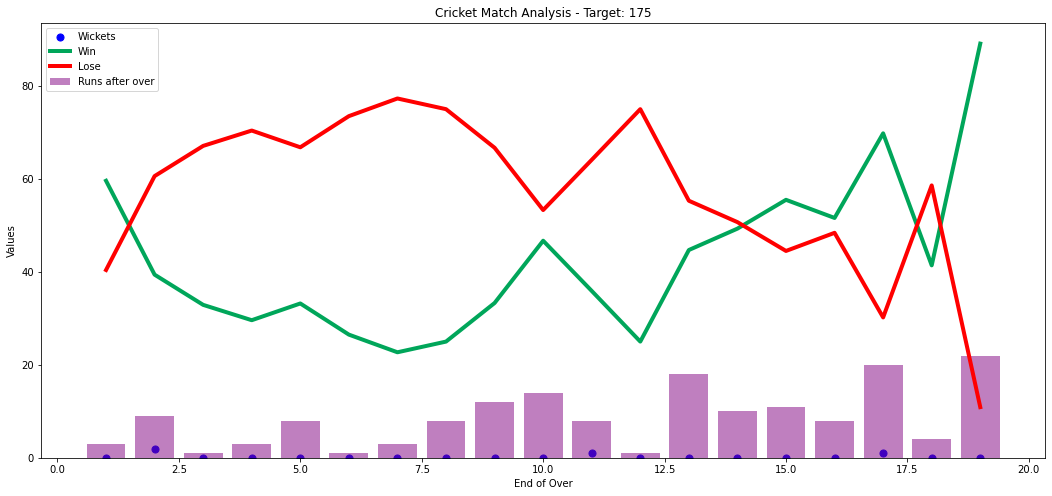

In [202]:
plt.figure(figsize=(18, 8))

# Scatter plot for wickets
plt.scatter(temp_df['end_of_over'], temp_df['wickets_in_over'], color='blue', marker='o', label='Wickets', s=50)

# Line plots for win and lose
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Win')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Lose')

# Bar plot for runs_after_over
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], color='purple', alpha=0.5, label='Runs after over')

# Set labels and title
plt.xlabel('End of Over')
plt.ylabel('Values')
plt.title('Cricket Match Analysis - Target: {}'.format(target))

# Display legend
plt.legend()

# Show the plot
plt.show()

#### Above graph is represting fluctuation in win probability for both the team during entire second innings
1. Purple bars are indicating number of runs scored per over
2. blue dots are indicating number of wickets after each over
3. Red line is indicating win probability for team who is bowling in second innings 
4. Green line is indicating win probability for team who is batting in second innings 